In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [249]:
def fi(x):
    return math.log(x)

def dw4(x):
    w_arr = x.copy()
    for i in range(4):
        w4 = 1
        for j in range(4):
            if (i != j):
                w4 *= (x[i]-x[j])
            w_arr[i] = round(w4,4)
    return w_arr

def print_arr(data):
    for title, value in data.items():
        print(f"| {value:6.3f} ", end='')
    print('|')
    
def find_L(x, x_arr, fw):
    L, res = 0, 0
    for i in range(4):
        L = fw[i]
        for j in range(4):
            if (i !=j ):
                L *= (x - x_arr[j])
        res += L
        L = 0
    return round(res,5)

def lagrange(x_arr, X):
    i = 0
    w_arr = dw4(x_arr)
    fw = x_arr.copy()
    print(f"|   i    |   xi   |   fi   |   w4'  | fi/w4' |  X*-xi |")
    print(f"-------------------------------------------------------")
    while (i<4):
        f = fi(x_arr[i])
        w = w_arr[i]
        fw[i] = f/w
        delta = X - x_arr[i]
        print_arr({"i": i, "xi": x_arr[i], "fi": f, "w4(xi)": w_arr[i], "fi/w4(xi)": fw[i], "X*-xi": delta})
        i += 1        
    
    L3 = find_L(X, x_arr, fw)
    y = round(fi(X),5)
    print("\nL3(",X,") = ", L3)
    print("y(",X,") = ", y)
    print("\nПогрешность интерполяции: =", round(L3-y,5))
    

In [250]:
def fi2(x1,x2):
    return (fi(x1)-fi(x2))/(x1-x2)

def fi3(x1,x2,x3):
    return (fi2(x1,x2)-fi2(x2,x3))/(x1-x3)

def fi4(x1,x2,x3,x4):
    return (fi3(x1,x2,x3)-fi3(x2,x3,x4))/(x1-x4)

def newton(x_arr, X):
    sz = len(x_arr)
    print('xi =', x_arr,'\n---------------------------------')
    arr = x_arr.copy()
    for i in range(sz):
        arr[i] = round(fi(x_arr[i]),5)
        print('f(x',i,') =', arr[i])
    print('---------------------------------')
    for i in range(1,sz):
        arr[i] = round(fi2(x_arr[i-1], x_arr[i]),5)
        print('f(x',i-1,',x',i,') =', arr[i])
    print('---------------------------------')
    for i in range(2,sz):
        arr[i] = round(fi3(x_arr[i-2], x_arr[i-1], x_arr[i]),5)
        print('f(x',i-2,',x',i-1,',x',i,') =', arr[i])
    print('---------------------------------')
    arr[-1] = round(fi4(x_arr[0], x_arr[1], x_arr[2], x_arr[3]),5)
    print('f(x0,x1,x2,x3) =', arr[-1])
    
    #arr[]
    #y = [[fi(x) for x in x_arr]]
    P3 = arr[0]
    tmp,i = 0,0
    while i < sz-1:
        tmp = arr[i+1]
        for j in range(i+1):
            tmp *= (X - x_arr[j])
        P3 += tmp
        i += 1
    print('\nP3(',X,') =', round(P3,5))
    y = round(fi(X),5)
    print("y(",X,") = ", y)
    print("\nПогрешность интерполяции: =", round(P3-y,5))
    #return arr, x_arr

In [251]:
x_arr = [0.2, 0.6, 1.0, 1.4]
print('Ньютон')
newton(x_arr, 0.8)
print('\nЛагранж')
lagrange(x_arr, 0.8)

Ньютон
xi = [0.2, 0.6, 1.0, 1.4] 
---------------------------------
f(x 0 ) = -1.60944
f(x 1 ) = -0.51083
f(x 2 ) = 0.0
f(x 3 ) = 0.33647
---------------------------------
f(x 0 ,x 1 ) = 2.74653
f(x 1 ,x 2 ) = 1.27706
f(x 2 ,x 3 ) = 0.84118
---------------------------------
f(x 0 ,x 1 ,x 2 ) = -1.83683
f(x 1 ,x 2 ,x 3 ) = -0.54485
---------------------------------
f(x0,x1,x2,x3) = 1.07665

P3( 0.8 ) = -0.20778
y( 0.8 ) =  -0.22314

Погрешность интерполяции: = 0.01536

Лагранж
|   i    |   xi   |   fi   |   w4'  | fi/w4' |  X*-xi |
-------------------------------------------------------
|  0.000 |  0.200 | -1.609 | -0.384 |  4.191 |  0.600 |
|  1.000 |  0.600 | -0.511 |  0.128 | -3.991 |  0.200 |
|  2.000 |  1.000 |  0.000 | -0.128 | -0.000 | -0.200 |
|  3.000 |  1.400 |  0.336 |  0.384 |  0.876 | -0.600 |

L3( 0.8 ) =  -0.20778
y( 0.8 ) =  -0.22314

Погрешность интерполяции: = 0.01536


## лаба 3_2 кубический сплайн

In [33]:
x_check = 0.8
x_i = [0.1, 0.5, 0.9, 1.3, 1.7 ]
f_i = [-2.3026, -0.69315, -0.10536, 0.26236, 0.53063]

In [34]:
def func(a, b, c, d, x):
    return a + b * x + c * (x ** 2) + d * (x ** 3)

def create_h_a(x_i, f_i):
    h_i = [0]
    for i in range(1, len(x_i)):
        x = x_i[i]-x_i[i-1]
        h_i.append(round(x,1))

    a_i = [0]
    for i in range(1, len(f_i)):
        x = f_i[i-1]
        a_i.append(x)
    return h_i, a_i

def create_b(f, c, h):
    n = len(f) - 1
    b = [0]

    for i in range(1, n):
        b.append((f[i] - f[i - 1]) / h[i] - 1 / 3 * h[i] * (c[i + 1] + 2 * c[i]))

    b.append((f[n] - f[n - 1]) / h[n] - 2 / 3 * h[n] * c[n])
    return [round(i, 4) for i in b]

def tma(a, b, c, d):
    size = len(a)
    p, q = [], []
    p.append(-c[0] / b[0])
    q.append(d[0] / b[0])

    for i in range(1, size):
        p_tmp = -c[i] / (b[i] + a[i] * p[i - 1])
        q_tmp = (d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1])
        p.append(p_tmp)
        q.append(q_tmp)

    x = [0 for _ in range(size)]
    x[size - 1] = q[size - 1]

    for i in range(size - 2, -1, -1):
        x[i] = p[i] * x[i + 1] + q[i]

    return x

def create_c(f, h):
    n = len(f)
    a = [0] + [h[i - 1] for i in range(3, n)]
    b = [2 * (h[i - 1] + h[i]) for i in range(2, n)]
    c = [h[i] for i in range(2, n - 1)] + [0]
    d = [3 * ((f[i] - f[i - 1]) / h[i] - ((f[i - 1] - f[i - 2]) / h[i - 1])) for i in range(2, n)]
    x = tma(a, b, c, d)
    res = [0, 0] + [round(i, 5) for i in x]
    return res


def create_d(h, c):
    n = len(c) - 1
    d = [0]
    for i in range(1, n):
        d.append((c[i + 1] - c[i]) / (3 * h[i]))
    d.append(-c[n] / (3 * h[n]))
    return [round(i, 5) for i in d]


def interval(x, x_check):
    for i in range(len(x) - 1):
        if x[i] <= x_check <= x[i + 1]:
            return i


def spline(x, f, x_check):
    n = len(x)
    h, a = create_h_a(x, f)
    c = create_c(f, h)
    b = create_b(f, c, h)
    d = create_d(h, c)
    print('h is: ', h)
    print('a is: ', a)
    print('b is: ', b)
    print('c is: ', c)
    print('d is: ', d, '\n')

    tmp = interval(x, x_check)

    ans = func(a[tmp + 1], b[tmp + 1], c[tmp + 1], d[tmp + 1], x_check - x[tmp])
    return ans, a, b, c, d

Starting spline function:
h is:  [0, 0.4, 0.4, 0.4, 0.4]
a is:  [0, -2.3026, -0.69315, -0.10536, 0.26236]
b is:  [0, 4.6729, 2.725, 0.9062, 0.8165]
c is:  [0, 0, -4.86967, 0.32254, -0.54681]
d is:  [0, -4.05806, 4.32684, -0.72446, 0.45567] 

Value of function in point X*:
F(0.8) = -0.19709561999999997


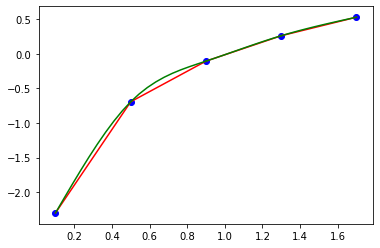

In [40]:
def show_plot(x, f, a, b, c, d):
    X, Y = [], []
    for i in range(len(x) - 1):
        x_i = np.linspace(x[i], x[i + 1], 10, endpoint=True)
        y_i = [func(a[i + 1], b[i + 1], c[i + 1], d[i + 1], j - x[i]) for j in x_i]
        X.append(x_i)
        Y.append(y_i)

    fig, ax = plt.subplots()
    ax.scatter(x, f, color='b')
    ax.plot(x, f, color='r')
    for i in range(len(x) - 1):
        ax.plot(X[i], Y[i], color='g')
    plt.show()
    
    
print('Starting spline function:')
y, a, b, c, d = spline(x_i, f_i, x_check)
print('Value of function in point X*:')
print(f'F({x_check}) = {y}')
show_plot(x_i, f_i, a, b, c, d) 